In [1]:
from pyautoml import Clean, Preprocess, Feature, Model
import pandas as pd

train_data = pd.read_csv('data/train.csv') 

Loading BokehJS ...

In [2]:
clean = Clean(data=train_data, target_field='Survived', report_name='Titanic')

In [3]:
# clean.data_report(title='Titanic Summary', output_file='titanic_summary.html')

## Cleaning

In [4]:
clean.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,712,712,712,NaN,NaN,573,712,712,NaN,712,NaN,NaN
mean,437.711,0.367978,2.32163,NaN,NaN,29.6646,0.502809,0.363764,NaN,31.5283,NaN,NaN
std,257.289,0.482594,0.827912,NaN,NaN,14.4393,1.06206,0.754532,NaN,50.4394,NaN,NaN
min,1,0,1,NaN,NaN,0.42,0,0,NaN,0,NaN,NaN
25%,217.75,0,2,NaN,NaN,20.5,0,0,NaN,7.8958,NaN,NaN
50%,425.5,0,3,NaN,NaN,29,0,0,NaN,13.6458,NaN,NaN
75%,661.25,1,3,NaN,NaN,38,1,0,NaN,30.0708,NaN,NaN
max,891,1,3,NaN,NaN,74,8,5,NaN,512.329,NaN,NaN
counts,712,712,712,712,712,573,712,712,712,712,158,710
uniques,712,2,3,712,2,85,7,6,567,222,122,3


In [5]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,712,712,712,712,712,573,712,712,712,712,158,710
uniques,712,2,3,712,2,85,7,6,567,222,122,3
missing,0,0,0,0,0,139,0,0,0,0,554,2
missing_perc,0%,0%,0%,0%,0%,19.52%,0%,0%,0%,0%,77.81%,0.28%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


mean                        31.5283
std                         50.4394
variance                    2544.13
min                               0
max                         512.329
mode                             13
5%                          7.18752
25%                          7.8958
50%                         13.6458
75%                         30.0708
95%                          111.96
iqr                          22.175
kurtosis                    37.8342
skewness                    5.15626
sum                         22448.1
mad                         27.6842
cv                          1.59981
zeros_num                        10
zeros_perc                    1.40%
deviating_of_mean                14
deviating_of_mean_perc        1.97%
deviating_of_median              41
deviating_of_median_perc      5.76%
top_correlations                   
counts                          712
uniques                         222
missing                           0
missing_perc                

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


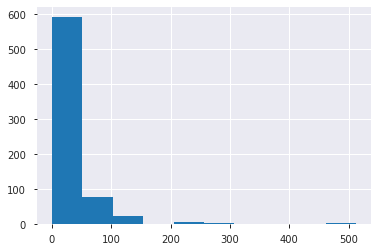

In [6]:
clean.describe_column('Fare')

31.52825308988764

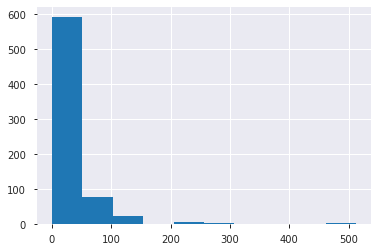

In [7]:
clean.describe_column('Fare')['mean']

In [8]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,554.00000,139.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.77809,0.195225,0.002809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,133.000000,38.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.743017,0.212291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
iter1 = clean.replace_missing_mostcommon('Fare', 'Embarked')

In [10]:
iter1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,NaN,26,S
1,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,NaN,7.75,Q
2,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,C7,164.867,S
3,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,NaN,21.075,S
4,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,NaN,24.15,S


In [11]:
iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,554.00000,139.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.77809,0.195225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,133.000000,38.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.743017,0.212291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


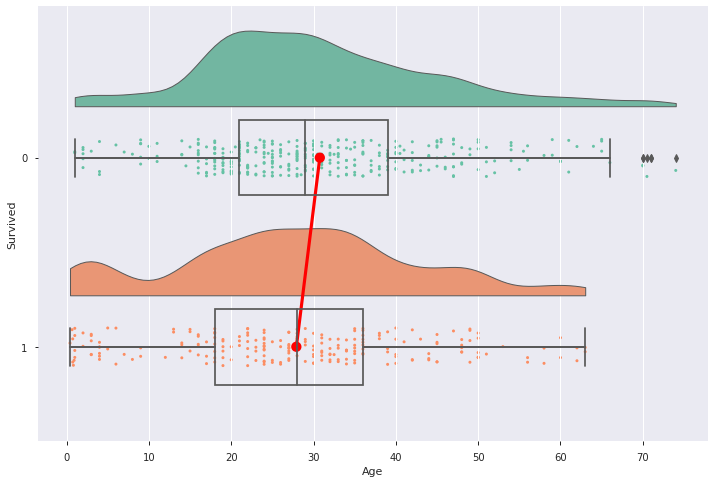

In [12]:
clean.visualize_raincloud('Age')

In [13]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,554.00000,139.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.77809,0.195225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,133.000000,38.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.743017,0.212291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
clean.replace_missing_random_discrete('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,NaN,26,S
1,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,NaN,7.75,Q
2,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,C7,164.867,S
3,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,NaN,21.075,S
4,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,NaN,24.15,S


In [15]:
clean.missing_values

,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,554.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.77809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,133.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.743017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
## Proving iter1 is a completely separate instance

iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,554.00000,139.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.77809,0.195225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,133.000000,38.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.743017,0.212291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
clean.visualize_barplot('Age', 'Survived', groupby='Age', method='mean', xlabel='Age')

In [18]:
clean.drop('Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26,S
1,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.75,Q
2,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.867,S
3,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,S
4,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.15,S


In [19]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
counts,712,712,712,712,712,712,712,712,712,712,712
uniques,712,2,3,712,2,85,7,6,567,222,3
missing,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,categorical,categorical


In [20]:
clean.visualize_scatterplot('Age', 'Fare', fill_color='yellow')

## Feature Engineering

In [21]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Nobel",
                    "Don":        "Nobel",
                    "Sir" :       "Nobel",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Nobel",
                    "Dona":       "Nobel",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Nobel"
                    } 

feature = Feature(clean)

In [22]:
feature.apply(lambda x: Title_Dictionary[x['Name'].split(',')[1].split('.')[0].strip()], 'Title')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,S,Mrs
1,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,Q,Mr
2,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,S,Miss
3,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master
4,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,S,Miss


In [23]:
feature['FamilySize'] = ( feature['SibSp'] + feature['Parch'],
                         feature.test_data['SibSp'] + feature.test_data['SibSp'] )

In [24]:
feature

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,S,Mrs,1
1,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,Q,Mr,0
2,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,S,Miss,2
3,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master,4
4,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,S,Miss,2


In [25]:
## Can still do apply and it will apply to both train and test dataset.

def get_person(passenger):
    age = passenger['Age']
    sex = passenger['Sex']
    return 'child' if age < 16 else sex

feature.apply(get_person, 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,S,Mrs,1,female
1,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,Q,Mr,0,male
2,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,S,Miss,2,female
3,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master,4,child
4,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,S,Miss,2,child


In [26]:
## Can still do lambda.

feature.apply(lambda x: 'child' if x['Age'] < 16 else x['Sex'], 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,S,Mrs,1,female
1,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,Q,Mr,0,male
2,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,S,Miss,2,female
3,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master,4,child
4,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,S,Miss,2,child


In [27]:
feature.drop('Name', 'Ticket', 'SibSp', 'Parch', 'Sex', 'PassengerId')

,Survived,Pclass,Age,Fare,Embarked,Title,FamilySize,Person
0,1,2,24.0,26.0000,S,Mrs,1,female
1,1,3,29.0,7.7500,Q,Mr,0,male
2,1,1,31.0,164.8667,S,Miss,2,female
3,0,3,2.0,21.0750,S,Master,4,child
4,0,3,10.0,24.1500,S,Miss,2,child


In [28]:
feature.onehot_encode('Person', 'Embarked', 'Title', 'Pclass', keep_col=False)

,Survived,Age,Fare,FamilySize,Person_child,Person_female,Person_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Nobel,Title_Officer,Pclass_1,Pclass_2,Pclass_3
0,1,24.0,26.0000,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,29.0,7.7500,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,31.0,164.8667,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,2.0,21.0750,4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,10.0,24.1500,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Modelling

In [29]:
model = Model(feature)

In [30]:
model.logistic_regression()

/home/sidha62/.virtualenvs/pyautoml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
model.list_models()

######## QUEUED MODELS ########
No queued models.

######### RAN MODELS ##########
log_reg


ValueError: too many values to unpack (expected 2)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


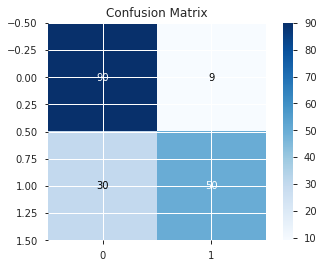

In [32]:
model.log_reg.confusion_matrix()